# Unsupervised

This example demonstrates various Unsupervised Model methods. We will use the Iris dataset.

In [80]:
from vertica_ml_python.learn.datasets import load_iris
iris = load_iris()
print(iris)

,SepalLengthCm,Species,PetalWidthCm,PetalLengthCm,SepalWidthCm
0,4.30,Iris-setosa,0.10,1.10,3.00
1,4.40,Iris-setosa,0.20,1.40,2.90
2,4.40,Iris-setosa,0.20,1.30,3.00
3,4.40,Iris-setosa,0.20,1.30,3.20
4,4.50,Iris-setosa,0.30,1.30,2.30
,...,...,...,...,...


<object>  Name: iris, Number of rows: 150, Number of columns: 5


Let's create a k-means model to segment the data into clusters.

In [82]:
from vertica_ml_python.learn.cluster import KMeans
model = KMeans("public.KMeans_iris", n_cluster = 3)
model.fit("public.iris", ["PetalWidthCm", "PetalLengthCm"])



centers
petalwidthcm|petallengthcm
------------+-------------
   2.03750  |   5.59583   
   0.24400  |   1.46400   
   1.34231  |   4.26923   


metrics
Evaluation metrics:
     Total Sum of Squares: 550.64347
     Within-Cluster Sum of Squares: 
         Cluster 0: 16.291667
         Cluster 1: 2.0384
         Cluster 2: 13.057692
     Total Within-Cluster Sum of Squares: 31.387759
     Between-Cluster Sum of Squares: 519.25571
     Between-Cluster SS / Total SS: 94.3%
 Number of iterations performed: 8
 Converged: True
 Call:
kmeans('public.KMeans_iris', 'public.iris', '"PetalWidthCm", "PetalLengthCm"', 3
USING PARAMETERS max_iterations=300, epsilon=0.0001, init_method='kmeanspp', distance_method='euclidean')

Fitting the model creates new model attributes, which make methods easier to use.

In [83]:
model.X

['"PetalWidthCm"', '"PetalLengthCm"']

In [85]:
model.input_relation

'public.iris'

These attributes will be used when invoking the different model abstractions. The model could also have other useful attributes. In the case of KMeans, the 'cluster_centers' and 'metrics' attributes can give you useful information about the model.

In [86]:
model.cluster_centers

,petalwidthcm,petallengthcm
0,2.0375,5.59583333333333
1,0.244,1.464
2,1.34230769230769,4.26923076923077


<object>

In [87]:
model.metrics

,value
Between-Cluster Sum of Squares,519.25571
Total Sum of Squares,550.64347
Total Within-Cluster Sum of Squares,31.387759
Between-Cluster SS / Total SS,0.942998034644813
converged,True


<object>

Let's look at the generated SQL code.

In [88]:
print(model.deploySQL())

APPLY_KMEANS("PetalWidthCm", "PetalLengthCm" USING PARAMETERS model_name = 'public.KMeans_iris', match_by_pos = 'true')


You can also add the prediction to your vDataFrame (The method 'predict' is only possible for built-in algorithms, the method 'to_vdf' is a way to replace it when the implementation is not possible). Do not forget to change the 'X' attribute if the columns names differ.

In [89]:
model.predict(iris, name = "pred_Species")

,SepalLengthCm,Species,PetalWidthCm,PetalLengthCm,SepalWidthCm,pred_Species
0,4.30,Iris-setosa,0.10,1.10,3.00,1
1,4.40,Iris-setosa,0.20,1.40,2.90,1
2,4.40,Iris-setosa,0.20,1.30,3.00,1
3,4.40,Iris-setosa,0.20,1.30,3.20,1
4,4.50,Iris-setosa,0.30,1.30,2.30,1
,...,...,...,...,...,...


<object>  Name: iris, Number of rows: 150, Number of columns: 6

Examine your prediction.

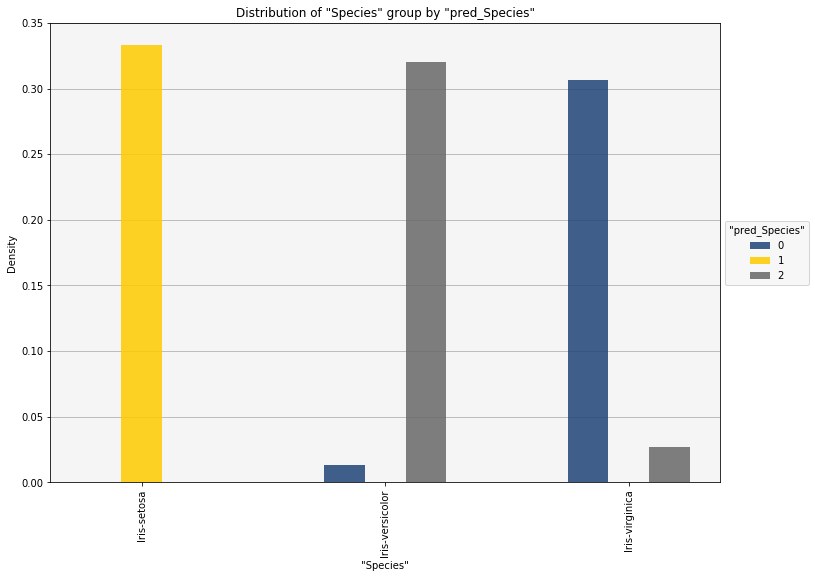

In [91]:
iris.hist(["Species", "pred_Species"])

Some Unsupervised Algorithms can be drawn.

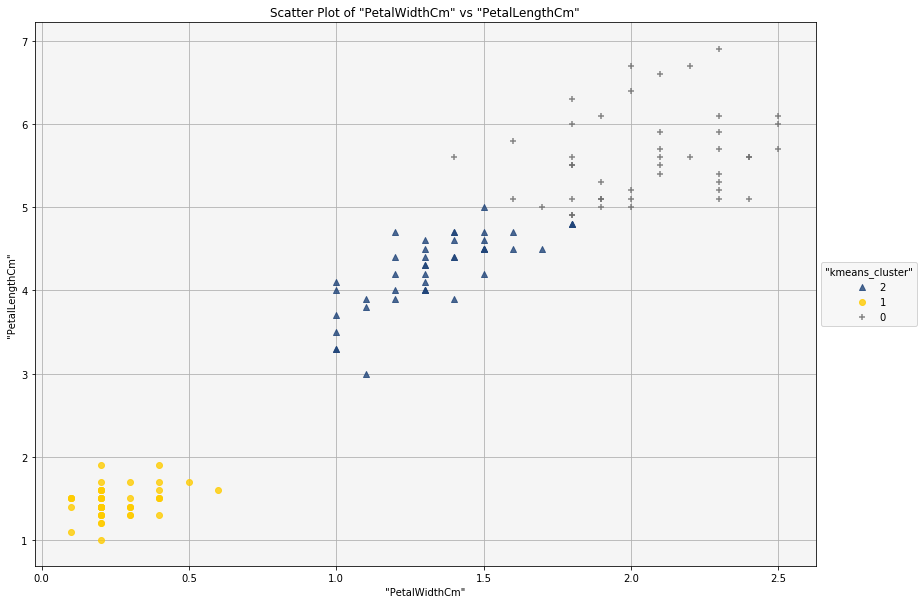

In [92]:
model.plot()

Some Algorithms are constructed using SQL code generation. Let's create a DBSCAN and a LOF.

In [102]:
from vertica_ml_python.learn.cluster import DBSCAN
model = DBSCAN("public.DBSCAN_iris")
model.fit("public.iris", ["PetalWidthCm", "PetalLengthCm"])

<DBSCAN>
Number of Clusters: 6
Number of Outliers: 0

In [103]:
from vertica_ml_python.learn.neighbors import LocalOutlierFactor
model2 = LocalOutlierFactor("public.LocalOutlierFactor_iris")
model2.fit("public.iris", ["PetalWidthCm", "PetalLengthCm"])

<LocalOutlierFactor>

These models store the results in a table. You can interact with these results with the 'to_vdf' method.

In [104]:
model.to_vdf()

,dbscan_cluster,PetalWidthCm,PetalLengthCm
0,0,0.10,1.10
1,0,0.20,1.40
2,0,0.20,1.30
3,0,0.20,1.30
4,0,0.30,1.30
,...,...,...


<object>  Name: DBSCAN_iris, Number of rows: 150, Number of columns: 3

In [105]:
model2.to_vdf()

,PetalLengthCm,lof_score,PetalWidthCm
0,1.10,2.08234031003641,0.10
1,1.40,0.982463512587469,0.20
2,1.30,1.14067601173295,0.20
3,1.30,1.14067601173295,0.20
4,1.30,1.25406400900897,0.30
,...,...,...


<object>  Name: LocalOutlierFactor_iris, Number of rows: 150, Number of columns: 3

Plot your models.

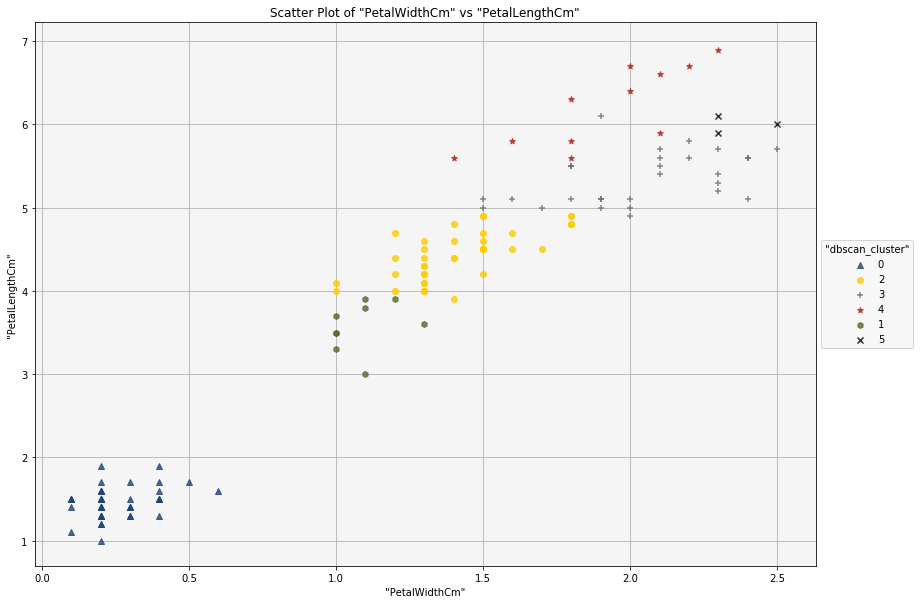

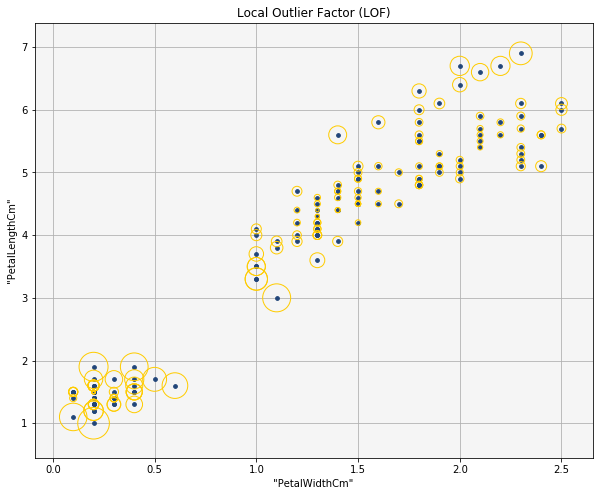

In [106]:
model.plot()
model2.plot()